This notebook calculate the sedimentation amount of 230Th. 

Formula:

    sedimentation = Th conc. in the last layer * sinking rate * dx * dy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from ArcticTools import map
%matplotlib inline

In [2]:
mesh=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/mesh_mask.nc')
tmask= mesh.variables['tmask'][0,:,400:,:]
e2t  = mesh.variables['e2t'][0,400:,:]
e1t  = mesh.variables['e1t'][0,400:,:]
mbathy=mesh.variables['mbathy'][0,400:,:]

In [3]:
nclist=['/ocean/xiaoxiny/research/result_jasper/data_exh005_bt/EXH005-bt_19912016.nc',
       # '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav/EXH005-btscav_19912016.nc',
        '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav_v2/EXH005-btscav_v2_19912016.nc',
        '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav_v2_cv/EXH005-btscav2_cv_19912015.nc',
        '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav_v2_cs/EXH005-btscav2_cs_19912016.nc'
       ]

In [4]:
xp = nc.Dataset(nclist[1]).variables['TR_10'][:]
ice3d = nc.Dataset(nclist[1]).variables['TR_12'][:]

In [5]:
def sedimentation(Th_conc,sinking,dx,dy):
    sed = Th_conc*sinking*dx*dy
    return sed

In [6]:
def sinking(ice):
    '''note that this s should be the regulated s, as the layer is hitting the sea floor.
    Ice has to ba an float only (list is not going to work)'''
    
    s1 = -986.96*ice+1456.45
    s2 = (3*(1-ice)+1)*s1
    s = np.min([s1,s2])
    return s

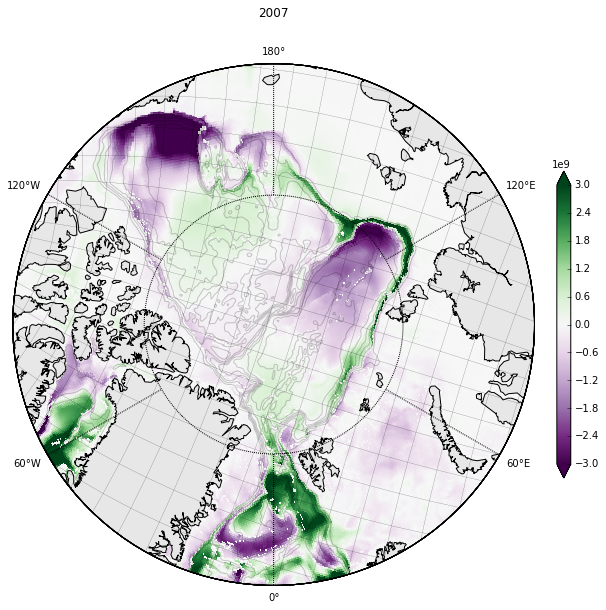

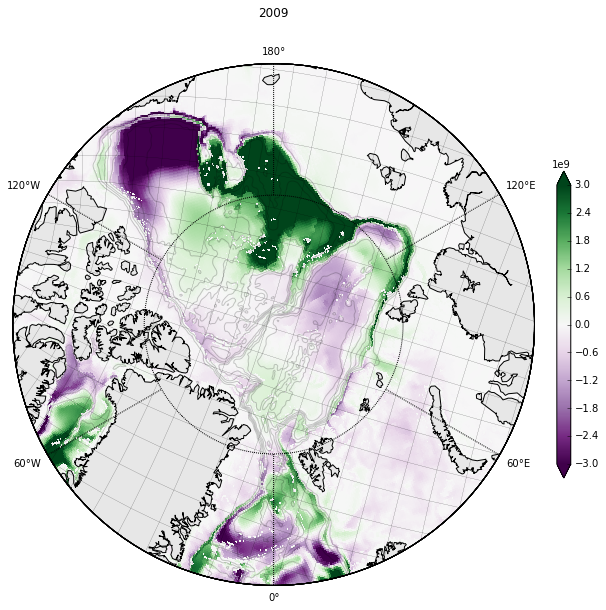

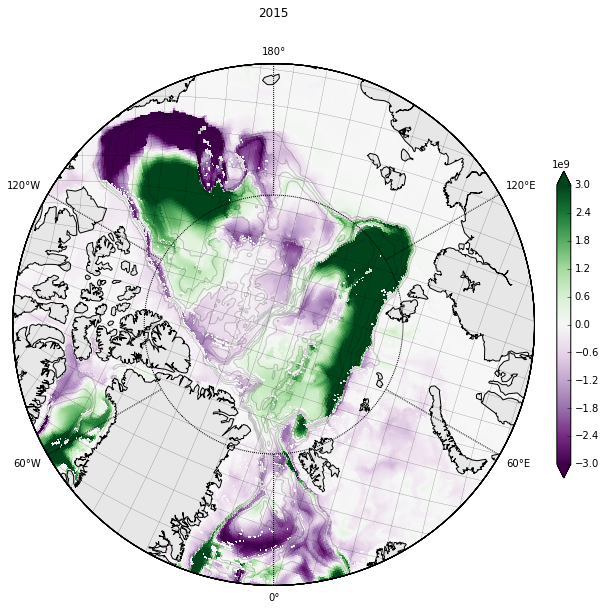

In [7]:
for year in [2007,2009,2015]:
    sed = np.zeros_like(e1t);sed0 = np.zeros_like(e1t)
    for i in range(len(e1t[:,0])):
        for j in range(len(e1t[0,:])):
            dep = mbathy[i,j]-1
            
            ice0 = ice3d[year-1991,dep,i,j]
            s0 = sinking(ice0)
            sed0[i,j]= sedimentation(xp[year-1991,dep,i,j],s0,e1t[i,j],e2t[i,j])
            
            
            ice = ice3d[year-1991,dep,i,j]
            s = sinking(ice)
            sed[i,j]= sedimentation(xp[year-1991,dep,i,j],s,e1t[i,j],e2t[i,j])\
                    - sedimentation(xp[2002-1991,dep,i,j],s0,e1t[i,j],e2t[i,j])\

    #plot
    f,ax = plt.subplots(1,figsize = (10,10))
    m,x_lon,y_lat=map.mapping(70)#maponCB(ax)
    cs = m.pcolor(x_lon[:],y_lat[:],np.ma.masked_invalid(sed[:,:]),\
                           cmap='PRGn',vmax=-3e9,vmin=3e9)
    plt.colorbar(cs,ax=ax,fraction=0.025, pad=0.04,extend='both');plt.title(year,y=1.08)
    plt.show()

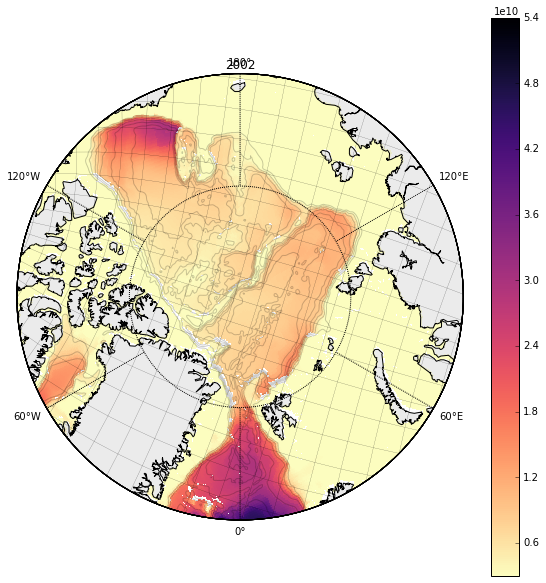

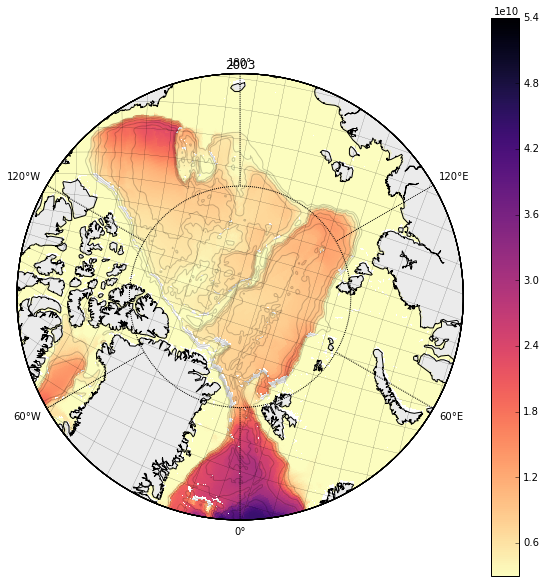

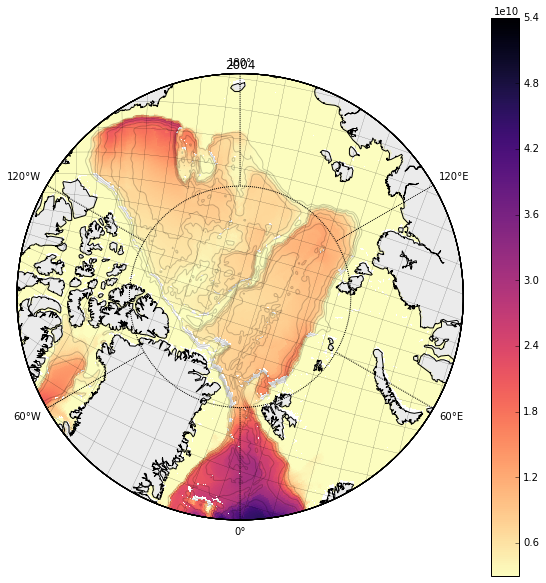

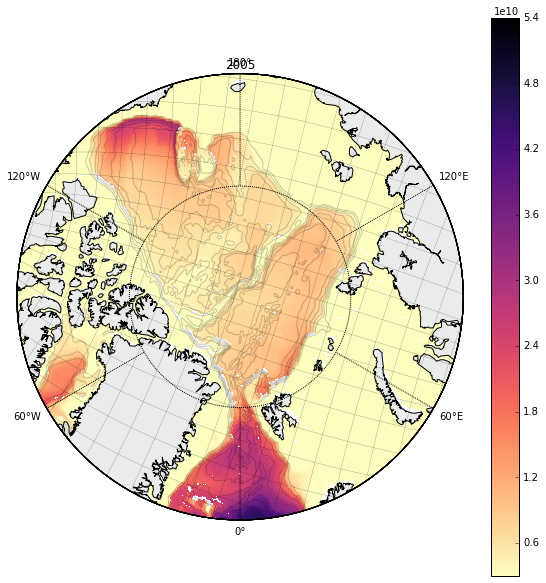

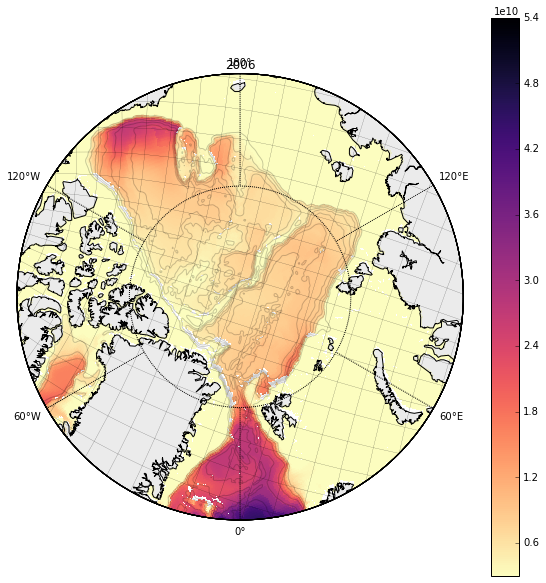

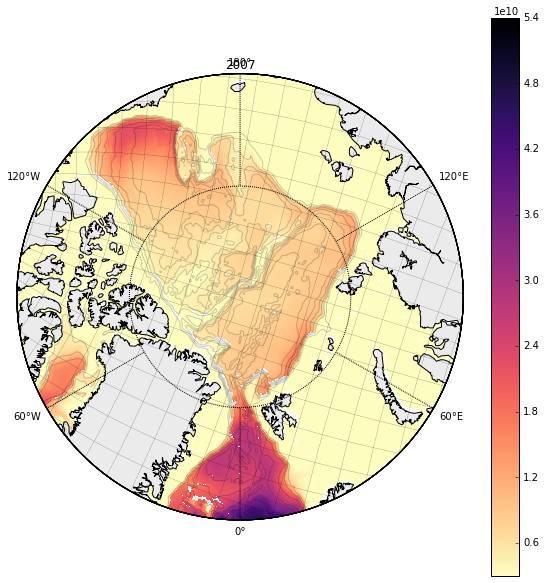

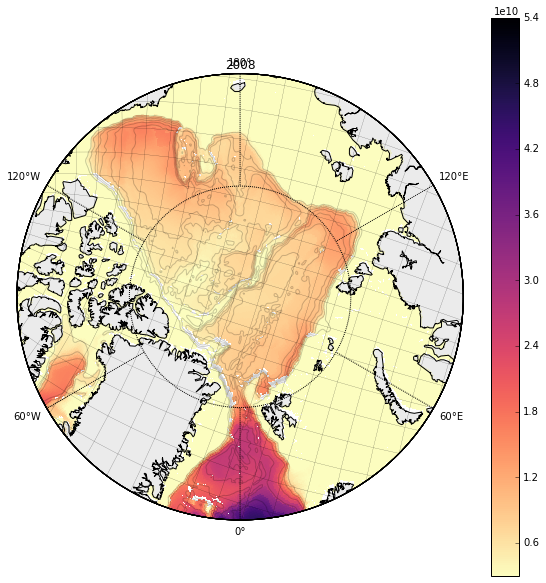

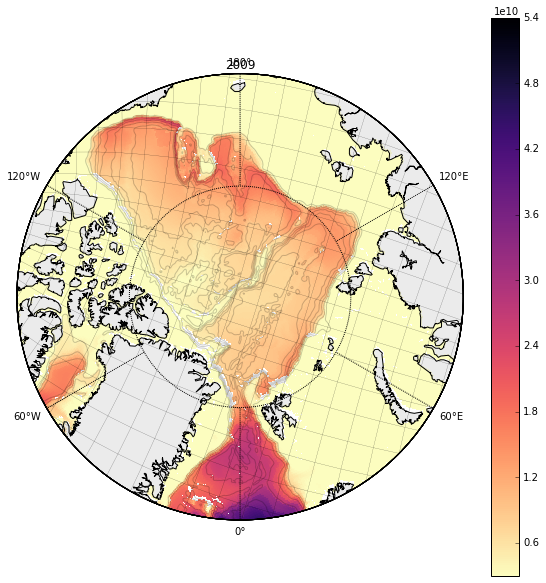

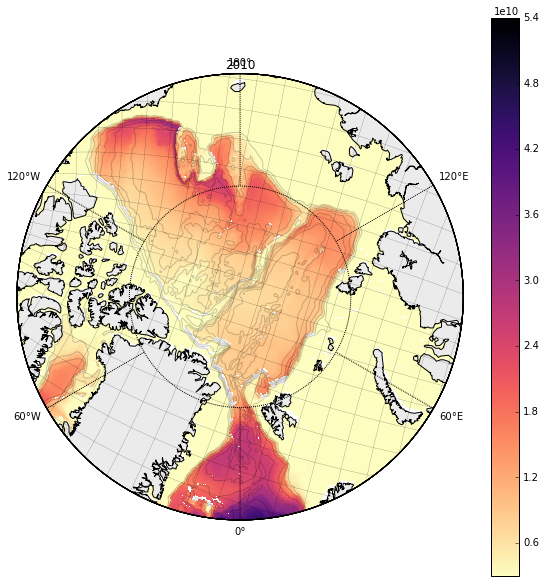

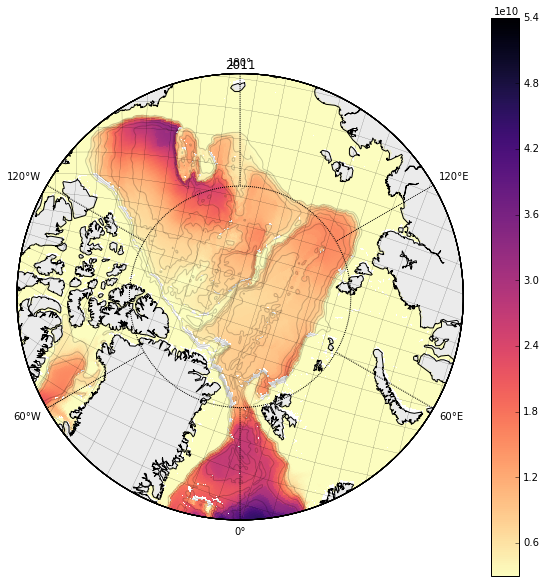

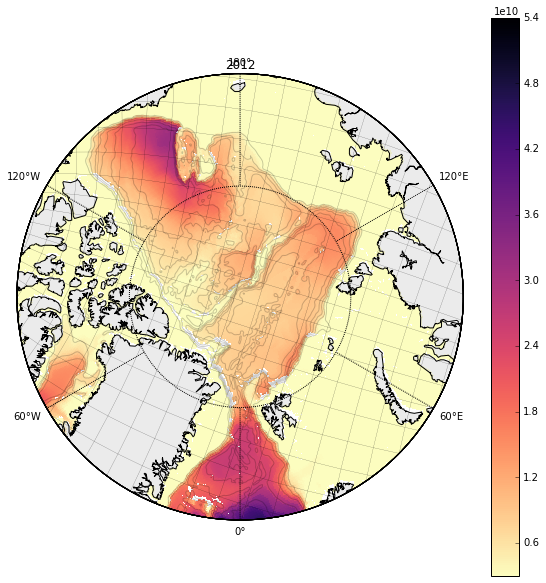

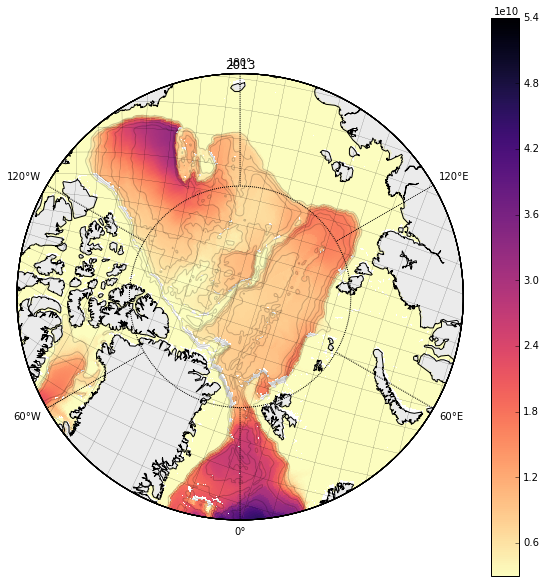

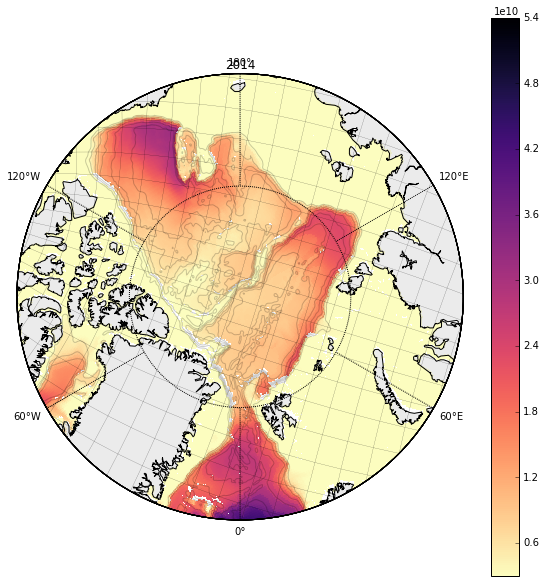

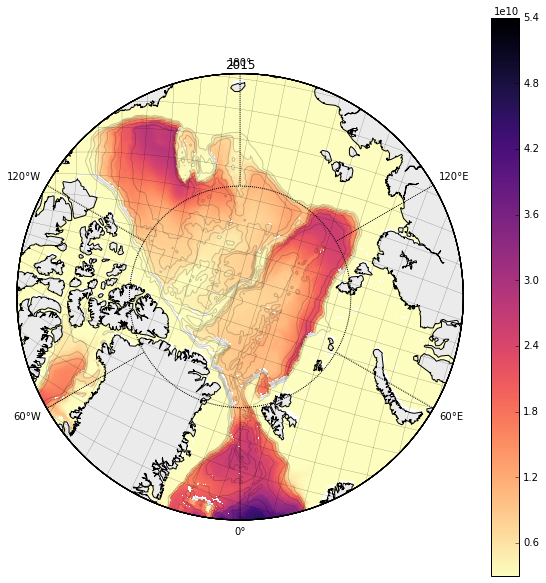

In [23]:
for year in range (2002,2016):
    sed = np.zeros_like(e1t);
    for i in range(len(e1t[:,0])):
        for j in range(len(e1t[0,:])):
            dep = mbathy[i,j]-1
            ice = ice3d[year-1991,dep,i,j]
            s = sinking(ice)
            sed[i,j]= sedimentation(xp[year-1991,dep,i,j],s,e1t[i,j],e2t[i,j])

    #plot
    f,ax = plt.subplots(1,figsize = (10,10))
    m,x_lon,y_lat=map.mapping(70)#maponCB(ax)
    cs = m.pcolor(x_lon[:],y_lat[:],np.ma.masked_invalid(sed[:,:]),\
                           cmap='magma_r',vmax=5.4e10,vmin=0.3e10)
    plt.colorbar(cs,ax=ax);plt.title(year)
    plt.show()